import library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


link "https://raw.githubusercontent.com/vaa9/propertydataset1/main/propertydatasetfix"

load dataset

In [39]:
import pandas as pd
url = "https://raw.githubusercontent.com/vaa9/propertydataset1/main/propertydatasetfix"
df = pd.read_csv(url)
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Below Standard,Setro Baru Utara,"30,00","60,00",2,1.0,2,287799000,Belum,NaN,Standard,< 1 Mobil
1,Standard,Kenjeran,"170,00","170,00",5,4.0,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
2,Sangat Premium,Kenjeran,"187,00","250,00",5,5.0,2,3100000000,Belum,Utara,Standard,1-2 Mobil
3,Premium,Kenjeran,"350,00","600,00",5,5.0,2,5000000000,Belum,Barat,Standard,1-2 Mobil
4,Premium,Kenjeran,"450,00","530,00",5,6.0,2,10800000000,Belum,NaN,Standard,1-2 Mobil


Data Preparation

1. cek apakah masih ada missing value pada data
2. lakukan label encoder
3. lakukan feature scaling pada data

In [13]:
df.isnull().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 1
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  82
Posisi Rumah                     115
Lebar Jalan Depan Rumah (ROW)     41
dtype: int64

mengisi missing value dengan random untuk yang memiliki banyak missing value, dan mengisi dengan modus pada missing value yang hanya 1

In [31]:
from random import choices
arahhadap =["Utara","Selatan", "Timur", "Barat"]
posisirumah =["Tusuk Sate","Tikungan/Hook","Tusuk Belakang/Membelakangi Jalan","Kantong Belakang/Ngantong","Standard","Cul De Sac/Ujung Gang Buntu"]
lebarjalan =["< 1 Mobil","1-2 Mobil","> 2 Mobil"]
isiarah = choices(arahhadap, k=82)
isiposisi = choices(posisirumah, k=115)
isilebar = choices(lebarjalan, k=41)
df['Jumlah Kamar Mandi'].replace([np.nan], df['Jumlah Kamar Mandi'].mode()[0], inplace=True)

df['Tingkat/Lantai '].replace([np.nan], df['Tingkat/Lantai '].mode()[0], inplace=True)
for i in df['Arah Hadap Rumah'].isnull():
  df['Arah Hadap Rumah'].replace([np.nan], isiarah[i], inplace=True)

for i in df['Posisi Rumah'].isnull():
  df['Posisi Rumah'].replace([np.nan], isiposisi[i], inplace=True)

for i in df['Lebar Jalan Depan Rumah (ROW)'].isnull():
  df['Lebar Jalan Depan Rumah (ROW)'].replace([np.nan], isilebar[i], inplace=True)



In [33]:
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

transform data with label encoder

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for cat_var in ['Area Category', 'Nama Daerah','Luas Tanah (m2)','Luas Bangunan (m2)', 'Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai ','Harga Penawaran (dari Owner)', 'Terjual/Belum','Arah Hadap Rumah', 'Posisi Rumah','Lebar Jalan Depan Rumah (ROW)' ]:
    df[cat_var] = le.fit_transform(df[cat_var])  

df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0,100,75,118,1,0,2,80,0,4,2,1
1,3,48,41,37,4,3,2,75,0,1,0,0
2,2,48,48,60,4,4,2,85,0,3,2,0
3,1,48,88,120,4,4,2,125,0,0,2,0
4,1,48,107,112,4,5,2,6,0,4,2,0


In [44]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
X=df


In [45]:
sc = StandardScaler()
standard = pd.DataFrame(sc.fit_transform(X),columns=X.columns)
scaled_features = sc.fit(df)

K-Means

elbow method

In [46]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# set the parameter for evaluating K
kmeans_kwargs = {
"init": "random",
"n_init": 300,
"random_state": 42,
}
# check the inertia for each K
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


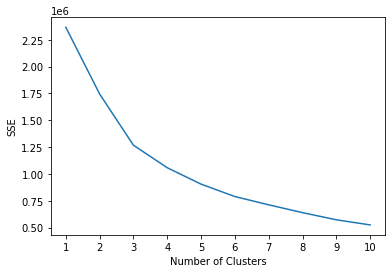

In [47]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [48]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
findknee = KneeLocator(range(1,11),sse, curve="convex", direction="decreasing")
print("best k for model is", findknee.elbow)

best k for model is 4


Training model K-Means pada dataset dengan jumlah cluster yang ditentukan

In [49]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(3)
cls = cl.fit_predict(X)
df['Cluster']=cls
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,0,100,75,118,1,0,2,80,0,4,2,1,2
1,3,48,41,37,4,3,2,75,0,1,0,0,1
2,2,48,48,60,4,4,2,85,0,3,2,0,2
3,1,48,88,120,4,4,2,125,0,0,2,0,2
4,1,48,107,112,4,5,2,6,0,4,2,0,0


HIERARCHICAL CLUSTERING

Hierarchical clustering ini menggunakan metode agglomerative.

Plot Dendrogram untuk membantu menentukan jumlah cluster, gunakan Single, Ward, Complete, Average

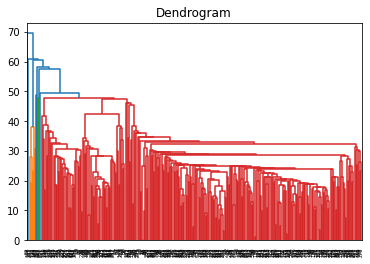

In [50]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.show()

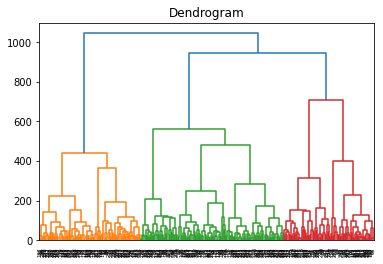

In [51]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show()

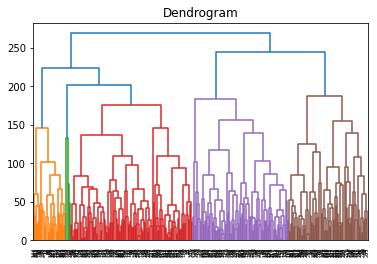

In [52]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendrogram')
plt.show()

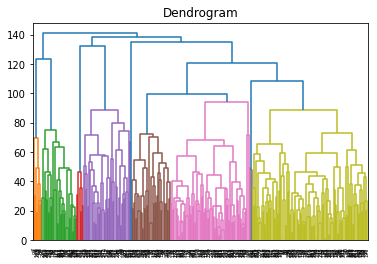

In [53]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.title('Dendrogram')
plt.show()

In [55]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(4,affinity = 'euclidean', linkage = 'single')
hirar = cl.fit_predict(X)
df['Cluster']=hirar
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,0,100,75,118,1,0,2,80,0,4,2,1,0
1,3,48,41,37,4,3,2,75,0,1,0,0,0
2,2,48,48,60,4,4,2,85,0,3,2,0,0
3,1,48,88,120,4,4,2,125,0,0,2,0,0
4,1,48,107,112,4,5,2,6,0,4,2,0,0


In [56]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(4,affinity = 'euclidean', linkage = 'ward')
hirar = cl.fit_predict(X)
df['Cluster']=hirar
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,0,100,75,118,1,0,2,80,0,4,2,1,0
1,3,48,41,37,4,3,2,75,0,1,0,0,1
2,2,48,48,60,4,4,2,85,0,3,2,0,0
3,1,48,88,120,4,4,2,125,0,0,2,0,0
4,1,48,107,112,4,5,2,6,0,4,2,0,3


In [57]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(4,affinity = 'euclidean', linkage = 'complete')
hirar = cl.fit_predict(X)
df['Cluster']=hirar
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,0,100,75,118,1,0,2,80,0,4,2,1,0
1,3,48,41,37,4,3,2,75,0,1,0,0,0
2,2,48,48,60,4,4,2,85,0,3,2,0,0
3,1,48,88,120,4,4,2,125,0,0,2,0,2
4,1,48,107,112,4,5,2,6,0,4,2,0,1


In [58]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(4,affinity = 'euclidean', linkage = 'average')
hirar = cl.fit_predict(X)
df['Cluster']=hirar
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,0,100,75,118,1,0,2,80,0,4,2,1,2
1,3,48,41,37,4,3,2,75,0,1,0,0,2
2,2,48,48,60,4,4,2,85,0,3,2,0,2
3,1,48,88,120,4,4,2,125,0,0,2,0,2
4,1,48,107,112,4,5,2,6,0,4,2,0,0
